In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("data.csv")   # agar naam data.csv hai

# date conversion
df['order_date'] = pd.to_datetime(df['order_date'])

# revenue column (VERY IMPORTANT)
df['revenue'] = df['quantity'] * df['price']

df.head()


,order_id,order_date,product,category,quantity,price,region,revenue
0,1001,2024-01-05,Laptop,Electronics,1,55000,North,55000
1,1002,2024-01-07,Mouse,Electronics,2,500,West,1000
2,1003,2024-01-10,Keyboard,Electronics,1,1500,South,1500
3,1004,2024-02-02,Chair,Furniture,2,3500,East,7000
4,1005,2024-02-05,Table,Furniture,1,8000,North,8000


In [6]:
df['month'] = df['order_date'].dt.to_period('M')


In [4]:


kpi_df = pd.DataFrame({
    "Metric": [
        "Total Revenue",
        "Total Orders",
        "Average Order Value"
    ],
    "Value": [
        total_revenue,
        total_orders,
        round(avg_order_value, 2)
    ]
})

kpi_df


,Metric,Value
0,Total Revenue,160250.0
1,Total Orders,10.0
2,Average Order Value,16025.0


In [7]:
monthly_sales = df.groupby('month')['revenue'].sum()

monthly_sales


month
2024-01    57500
2024-02    71000
2024-03    31750
Freq: M, Name: revenue, dtype: int64

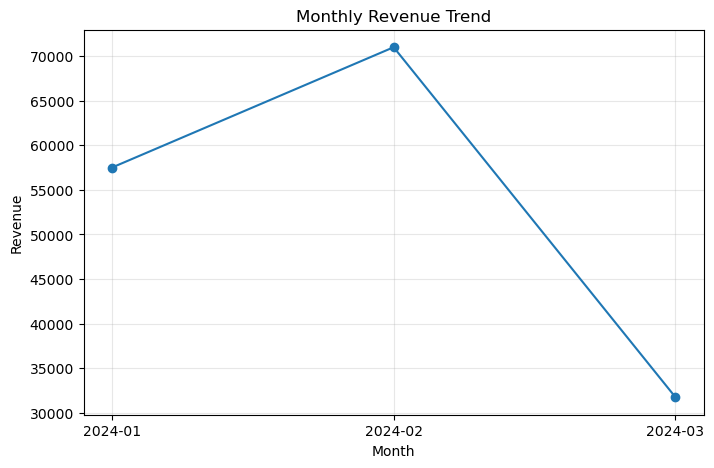

In [8]:
plt.figure(figsize=(8,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()


In [9]:
region_sales = df.groupby('region')['revenue'].sum()

region_sales


region
East     10600
North    64350
South    25500
West     59800
Name: revenue, dtype: int64

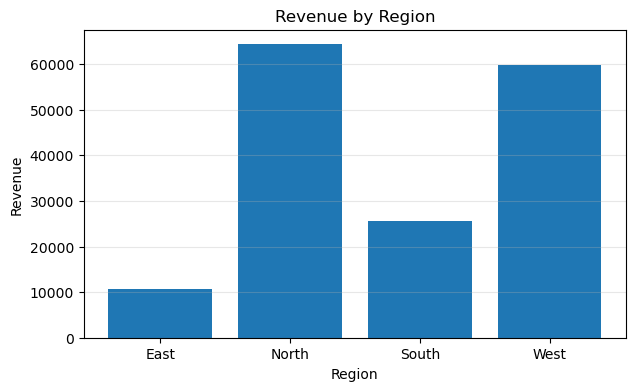

In [10]:
plt.figure(figsize=(7,4))
plt.bar(region_sales.index, region_sales.values)

plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [11]:
product_sales = (
    df.groupby('product')['revenue'].sum()
    .sort_values(ascending=False)
)

product_sales


product
Laptop      111000
Monitor      24000
Chair        10600
Table         8000
Keyboard      4300
Mouse         2350
Name: revenue, dtype: int64

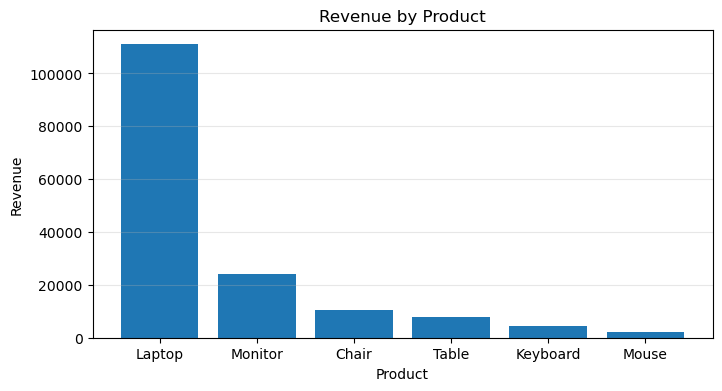

In [12]:
plt.figure(figsize=(8,4))
plt.bar(product_sales.index, product_sales.values)

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [13]:
category_sales = df.groupby('category')['revenue'].sum()

category_sales


category
Electronics    141650
Furniture       18600
Name: revenue, dtype: int64

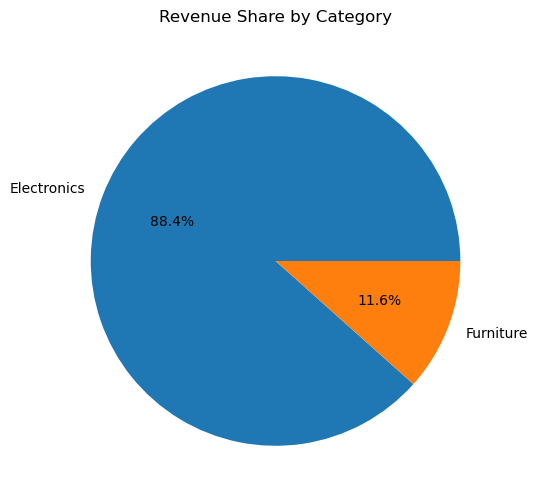

In [14]:
plt.figure(figsize=(6,6))
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')

plt.title("Revenue Share by Category")
plt.show()
